# CS 109A Data Science: Project
**Harvard University**<br>
**Fall 2016**<br>
**Team member:** Becerra, Fernando; Mayo, Andrew Wayne; Ding, Yi; Cao, Xinrui<br>
**Project topic:** Predicting Seizures and Epilepsy

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import time
from scipy.stats import mode
from sklearn import linear_model
import sklearn.linear_model as sk
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
import sklearn.discriminant_analysis as da
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
# Read in the data set
epil = pd.read_csv('Data/Updated seizure csv/epil.csv', delimiter=',')
epil.head()

,Unnamed: 0,y,trt,base,age,V4,subject,period,lbase,lage
0,1,5,placebo,11,31,0,1,1,-0.756354,0.114204
1,2,3,placebo,11,31,0,1,2,-0.756354,0.114204
2,3,3,placebo,11,31,0,1,3,-0.756354,0.114204
3,4,3,placebo,11,31,1,1,4,-0.756354,0.114204
4,5,3,placebo,11,30,0,2,1,-0.756354,0.081414


In [3]:
# Change objects into numerics
list1 = np.where(epil['trt']=='progabide')
list2 = np.where(epil['trt']!='progabide')
for ind in list1:
    epil['trt'][ind] = 1

for ind in list2:
    epil['trt'][ind] = 0
sum(epil['trt'])

epil.head()
x = epil.iloc[:, 2:9]   # 7 covariates
y = epil.iloc[:, -9]    # count of seizure for a 2-week period.

/Users/dilys/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/dilys/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
# Fit a Linear Discriminant Analysis (LDA)
LDA = da.LinearDiscriminantAnalysis()
model_LDA = LDA.fit(x, y.astype(int))
print 'Accuracy of LDA:', LDA.score(x,y.astype(int))

Accuracy of LDA: 0.317796610169


In [5]:
# Fit a multinomial logistic regression model
logitm = sk.LogisticRegression(C = 1000000, penalty="l1")
logitm.fit(x, y)

print 'Accuracy of multinomial logistic regression:', logitm.score(x,y.astype(int))

Accuracy of multinomial logistic regression: 0.343220338983


- **Each subject is observed in 4 period, should we combine them into 1 longer period and build model on top of that?** 

In [8]:
# Read in data set UKDA-2024-tab
UKDA_2024_tab = pd.read_table('Data/1958 NCDS/UKDA-2024-tab/tab/warnock.tab')
UKDA_4992_tab = pd.read_table('Data/1958 NCDS/UKDA-4992-tab/tab/ncds37yearsurveydata.tab')
UKDA_5567_tab1 = pd.read_table('Data/1958 NCDS/UKDA-5567-tab/tab/ncds5cmi.tab')
UKDA_5567_tab2 = pd.read_table('Data/1958 NCDS/UKDA-5567-tab/tab/ncds5mc.tab')
UKDA_5578_tab = pd.read_table('Data/1958 NCDS/UKDA-5578-tab/tab/ncds6.tab')
UKDA_6137_tab = pd.read_table('Data/1958 NCDS/UKDA-6137-tab/tab/ncds_2008_followup.tab')


/Users/dilys/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (2,119,448,451,455,524,529,548,587,589,596,598,601,605,680,687,689,897,898,899,914,918,922) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/dilys/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4,8,9,79,128,129,130,131,132,133,134,136,139,142,145,148,151,154,157,160,163,166,171,172,173,174,177,178,179,180,183,184,186,187,188,189,190,191,192,193,194,196,197,199,200,201,202,203,204,205,206,207,209,212,215,229,231,234,235,236,237,240,241,242,243,249,257,286,289,290,291,292,295,296,297,298,301,302,303,304,407,416,425,444,445,449,450,453,454,455,459,460,463,464,465,469,470,473,474,475,479,480,483,484,489,490,495,496,501,502,541,542,546,547,551,552,556,557,560,561,572,573,574,575,576,578,579,580,581,582,584,585,586,587,588,590,591,592,5

In [59]:
UKDA_2024_tab.head()

,NCDSID,NWARNOCK,NW0006,NW0007,NW0016,NW0017,NW0018,NW0019,NW0020,NW0023,...,NW0311,NW0312,NW0313,NW0314,NW0315,NW0316,NW0317,NW0318,NW0320,NW0321
0,N10062B,5,541,6,3,6,1,-3,-3,7,...,-1,-1,3,1,1,7,4,0,1,1
1,N10092H,7,81,1,3,6,1,-3,-3,5,...,-1,-1,2,1,2,5,7,0,2,6
2,N10130W,4,130,2,1,8,1,-3,-3,7,...,0,0,1,6,7,7,2,0,4,-1
3,N10166J,5,1033,11,1,7,1,-3,-3,2,...,-1,-1,2,2,1,7,3,0,1,6
4,N10211W,7,710,8,3,7,1,-3,-3,6,...,-1,-1,1,1,1,4,3,0,2,2


In [10]:
# 1976, age = 18
list_epil = np.where(UKDA_2024_tab['NW0284'] == 2)    # Health problem Epilepsy  
list_epil2 = np.where(UKDA_2024_tab['NW0285'] == 2)    # Health problem Epilepsy 
print list_epil, list_epil2

diseased_size = 6
sample_size = len(UKDA_2024_tab)
y18 = float(diseased_size)/float(sample_size)

(array([  3,  94, 163, 295, 381]),) (array([382]),)


In [11]:
# 1991, age = 33
ever_suffer = np.where(UKDA_5567_tab1['n503930'] =="1")
only_pregnant = np.where(UKDA_5567_tab1['n503930'] =="2")
suffer_last_12_month = np.where(UKDA_5567_tab1['n503931']=='1')
seen_doctor_last_12_month = np.where(UKDA_5567_tab1['n503932']=='1')
print ever_suffer  # Ever suffered yes
print only_pregnant   # Only when pregnant
print suffer_last_12_month   # subject having seizure during the last 12 month
print seen_doctor_last_12_month   # subject went to the doctor's during the last 12 month

#for ind in ever_suffer:
#    diseased_individual = UKDA_5567_tab1.iloc[ind]
#print diseased_individual.shape

diseased_size = 138 + 22
sample_size = len(UKDA_5567_tab1)
y33_1 = float(diseased_size)/float(sample_size)

(array([   20,    53,    90,    92,    95,   350,   505,   561,   581,
         786,   842,   872,   906,   930,  1005,  1101,  1103,  1104,
        1167,  1310,  1386,  1411,  1422,  1555,  1562,  1831,  2061,
        2062,  2063,  2082,  2128,  2225,  2332,  2346,  2409,  2542,
        2549,  2582,  2588,  2663,  2753,  3077,  3209,  3253,  3259,
        3289,  3306,  3318,  3383,  3560,  3610,  3826,  3900,  3931,
        4139,  4292,  4511,  4523,  4678,  4780,  4813,  4885,  4924,
        5056,  5058,  5216,  5287,  5584,  5643,  5702,  5940,  5944,
        5995,  6017,  6147,  6232,  6297,  6362,  6371,  6573,  6599,
        6603,  6645,  6689,  6807,  6835,  6939,  6941,  7028,  7043,
        7063,  7190,  7266,  7354,  7475,  7575,  7709,  7717,  7754,
        7846,  7966,  7997,  8254,  8273,  8359,  8472,  8510,  8681,
        8799,  8803,  8885,  8977,  8982,  9191,  9280,  9293,  9375,
        9423,  9458,  9506,  9615,  9824,  9831,  9868,  9915, 10049,
       10076, 10129

In [12]:
# 1991, AGE = 33
mother_epil_ever = np.where(UKDA_5567_tab2['n516623'] == 1)   # mother who had epil before
print mother_epil_ever

age_first_attack = np.where(UKDA_5567_tab2['n516624'] != 0)    # age first attacked by epil
print age_first_attack

age_last_attack = np.where(UKDA_5567_tab2['n516626'] != 0)    # age last attacked by epil
print age_last_attack
    
diseased_size = 13
sample_size = len(UKDA_5567_tab2)
y33_2 = float(diseased_size)/float(sample_size)
y33 = float(138 + 22+13) / (len(UKDA_5567_tab1) + len(UKDA_5567_tab2))


(array([ 371, 1363, 1438, 1565, 1793, 1925, 2360, 3295, 3629, 3780, 3977,
       4234]),)
(array([ 371, 1363, 1438, 1565, 1793, 1925, 3780, 3977, 4234]),)
(array([ 371, 1363, 1438, 1565, 1793, 1925, 2360, 3295, 3629, 3780, 3977]),)


In [13]:
# 1995, age = 37
np.where(UKDA_4992_tab['nss2127'] =="6")    ## long-term problem: Epilepsy

diseased_size = 6
sample_size = len(UKDA_4992_tab)
y37 = float(diseased_size)/float(sample_size)

In [14]:
# 1999-2000, AGE 42
seizure_ever = np.where(UKDA_5578_tab['fit'] == 1)   # CM ever had fits,convulsions,epilepsy
#print seizure_ever
len(UKDA_5578_tab)
#len(seizure_ever)
for ind in seizure_ever:
    diseased_individual = UKDA_5578_tab.iloc[ind]
diseased_individual.shape

#UKDA_5578_tab[['fit','sexp','age', 'sex']].describe() 

diseased_size = 119
sample_size = len(UKDA_5578_tab)
y42 = float(diseased_size)/float(sample_size)

#diseased_individual[sexp]
#diseased_individual[age]
#print UKDA_5578_tab.columns.values

42 23 16
6796 2204 608


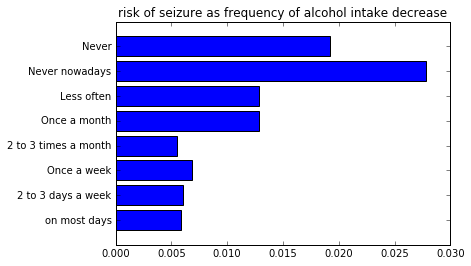

In [85]:
# 2008-2009, AGE 50
seizure_ever1 = UKDA_6137_tab[UKDA_6137_tab['N8KHPB04'] == 1]  # "KHLPRB4" CM ever had fits,convulsions,epilepsy
#print seizure_ever1

medicat1 = UKDA_6137_tab[UKDA_6137_tab['N8FITSMD'] == 1] # "fitsmed" reg medicat for convulsion/fits/epileptic seizures
#print medicat1

seizure_ever2 = UKDA_6137_tab[UKDA_6137_tab['N8XKHP04'] == 1] # "Proxy" CM ever had fits,convulsions,epilepsy
#print seizure_ever2

medicat2 = UKDA_6137_tab[UKDA_6137_tab['N8XFITMD'] == 1] # "proxy" reg medicat for convulsion/fits/epileptic seizures
#print medicat2

alcohol_high1 = seizure_ever1[(seizure_ever1['N8DRINKS'] == 1)|(seizure_ever1['N8DRINKS'] == 2)|(seizure_ever1['N8DRINKS'] == 3) ]
alcohol_low1 = seizure_ever1[(seizure_ever1['N8DRINKS'] == 4)|(seizure_ever1['N8DRINKS'] == 5)|(seizure_ever1['N8DRINKS'] == 6)]
alcohol_never1 = seizure_ever1[(seizure_ever1['N8DRINKS'] == 7)|(seizure_ever1['N8DRINKS'] == 8)]

print len(alcohol_high1), len(alcohol_low1), len(alcohol_never1)

alcohol_high2 = UKDA_6137_tab[(UKDA_6137_tab['N8DRINKS'] == 1)|(UKDA_6137_tab['N8DRINKS'] == 2)|(UKDA_6137_tab['N8DRINKS'] == 3) ]
alcohol_low2 = UKDA_6137_tab[(UKDA_6137_tab['N8DRINKS'] == 4)|(UKDA_6137_tab['N8DRINKS'] == 5)|(UKDA_6137_tab['N8DRINKS'] == 6)]
alcohol_never2 = UKDA_6137_tab[(UKDA_6137_tab['N8DRINKS'] == 7)|(UKDA_6137_tab['N8DRINKS'] == 8)]

print len(alcohol_high2), len(alcohol_low2), len(alcohol_never2)
  
#Value = 1 Label = On most days?  
#Value = 2 Label = 2 to 3 days a week?    
#Value = 3 Label = Once a week?   
#Value = 4 Label = 2 to 3 times a month?  
#Value = 5 Label = Once a month?  
#Value = 6 Label = Less often, special occasions  
#Value = 7 Label = Never nowadays 
#Value = 8 Label = CM has never had an alcoholic drink    

results = np.zeros(8)
for i in range(1,9):
    results[i-1]=  float(len(seizure_ever1[seizure_ever1['N8DRINKS'] == i]))/len(UKDA_6137_tab[UKDA_6137_tab['N8DRINKS'] == i])

labels=['on most days','2 to 3 days a week','Once a week', '2 to 3 times a month','Once a month','Less often','Never nowadays','Never']
plt.barh(range(1,9), results, align = 'center', tick_label = labels)
plt.title('risk of seizure as frequency of alcohol intake decrease')
plt.show()


#### Seems that the risk of seizure dicrease as people drink more requently.
#### It's not a final conclusion...

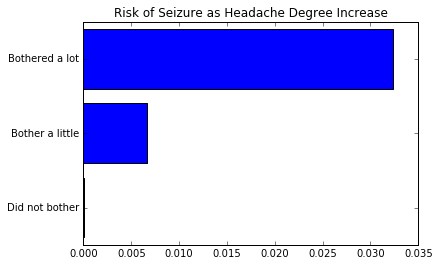

In [87]:
results2 = np.zeros(3)
for i in range(1,4):
    results2[i-1] = float(len(seizure_ever1[seizure_ever1['N8SYMP20'] == i]))/len(UKDA_6137_tab[UKDA_6137_tab['N8SYMP20'] == i])

#Value = 1	Label = Didn't bother CM       
#Value = 2	Label = Bothered CM a little   
#Value = 3	Label = Bothered CM a lot 
results2[0]=results2[0]+0.0001
labels = ['Did not bother', 'Bother a little','Bothered a lot' ]
plt.barh(range(1,4), results2, tick_label=labels, align='center')
plt.title('Risk of Seizure as Headache Degree Increase')

plt.show()
    

#### the people with more severe headache may have a larger chance to suffer from Convulsion, fit, epilepsy

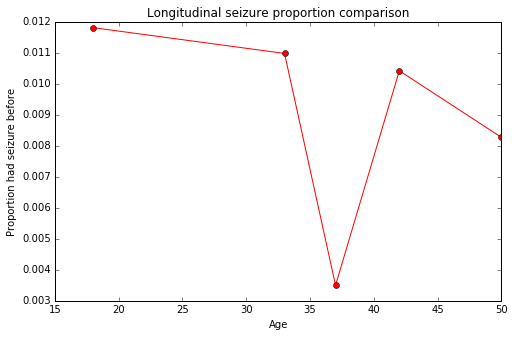

In [225]:
list_proportion = [y18, y33, y37, y42, y50]
list_age = [18, 33, 37, 42, 50]
plt.figure(figsize=(8,5))
plt.plot(list_age, list_proportion,'ro-')
plt.xlabel('Age'); plt.ylabel('Proportion had seizure before')
plt.title('Longitudinal seizure proportion comparison')
plt.show()